Import Libraries & Load Data

In [31]:
import os
print(os.getcwd())


d:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Analysis\notebooks


In [32]:
#  Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os

#  Load the dataset
df = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\EV_India_2014-2025_MarketData.csv")

#  Filter only four-wheeler data
ev_4w = df[df["Vehicle Type"] == "4W"]

#  Check sample
ev_4w.head()


,Year,State,Vehicle Type,Registrations,EV Share (%),Chargers,FAME II Policy,Monthly Income Bracket (Main Buyer),Age Group,City Type,Psychographic Segment
2,2014,Delhi,4W,3681,0.28,94,0,40000-60000,60+,Urban,Eco-conscious
5,2014,Maharashtra,4W,2269,0.74,34,0,60000-100000,36-45,Urban,Luxury-focused
8,2014,Karnataka,4W,11278,0.56,61,0,<20000,36-45,Semi-Urban,Practical
11,2014,Tamil Nadu,4W,6469,2.40,91,0,20000-40000,60+,Urban,Eco-conscious
14,2014,Gujarat,4W,9158,1.42,38,0,40000-60000,26-35,Semi-Urban,Eco-conscious


National 4W EV Registration Trend (2014–2025)

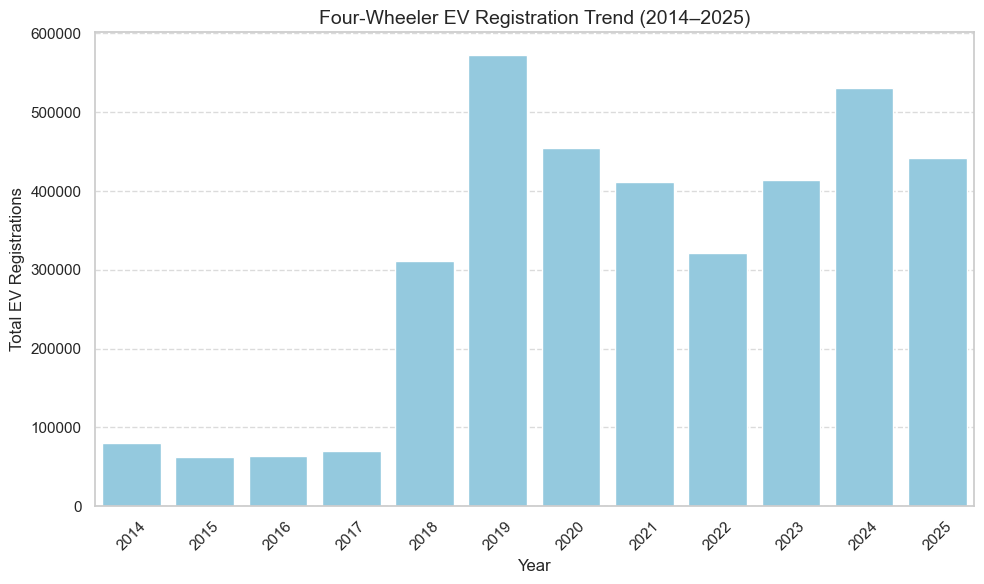

In [33]:
# Group by year and sum registrations
ev_4w_trend = ev_4w.groupby("Year")["Registrations"].sum().reset_index()

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=ev_4w_trend, x="Year", y="Registrations", color="skyblue")

plt.title("Four-Wheeler EV Registration Trend (2014–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total EV Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


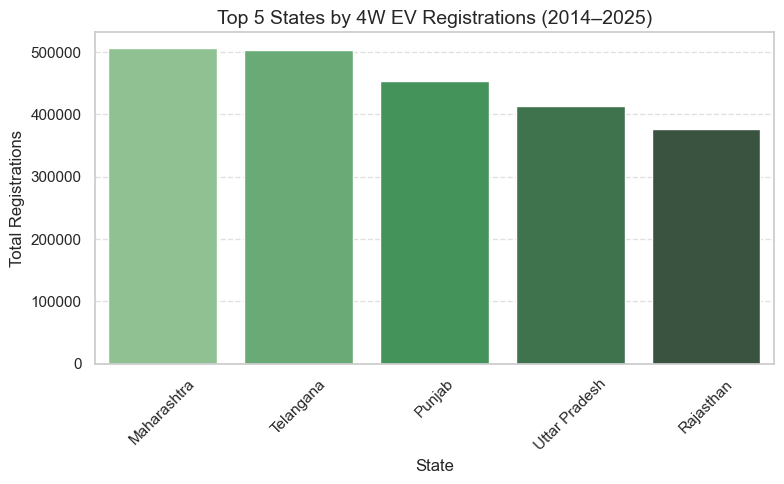

In [34]:
# Group 4W data by state and sum registrations
state_4w = ev_4w.groupby("State")["Registrations"].sum().reset_index()

# Sort and pick top 5
top_5_4w_states = state_4w.sort_values(by="Registrations", ascending=False).head(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_4w_states, x="State", y="Registrations", palette="Greens_d")

plt.title("Top 5 States by 4W EV Registrations (2014–2025)", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Distribution of 4W EV Buyers by Income Bracket

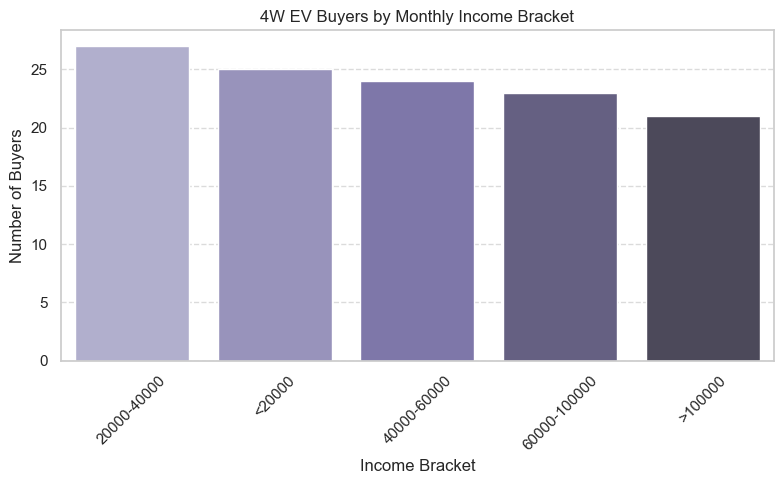

In [35]:
# Plot income segment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=ev_4w, x='Monthly Income Bracket (Main Buyer)', order=ev_4w['Monthly Income Bracket (Main Buyer)'].value_counts().index, palette='Purples_d')

plt.title('4W EV Buyers by Monthly Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Distribution by Psychographic Segment

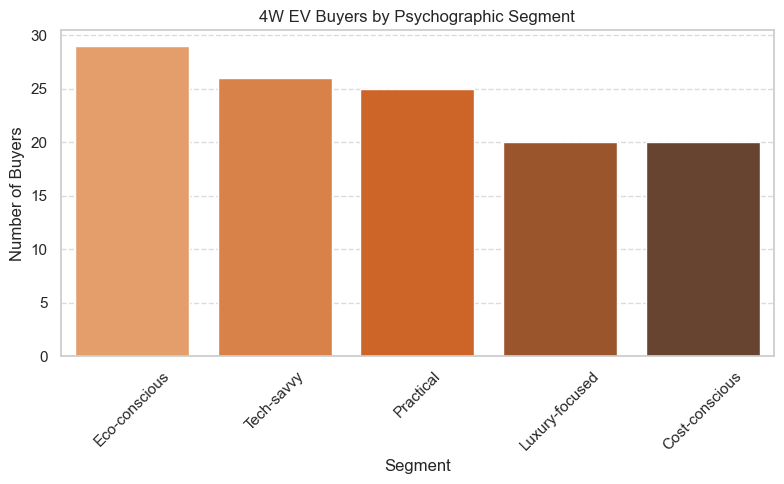

In [36]:
# Plot psychographic segment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=ev_4w, x='Psychographic Segment', order=ev_4w['Psychographic Segment'].value_counts().index, palette='Oranges_d')

plt.title('4W EV Buyers by Psychographic Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Age Group Distribution of 4W EV Buyers

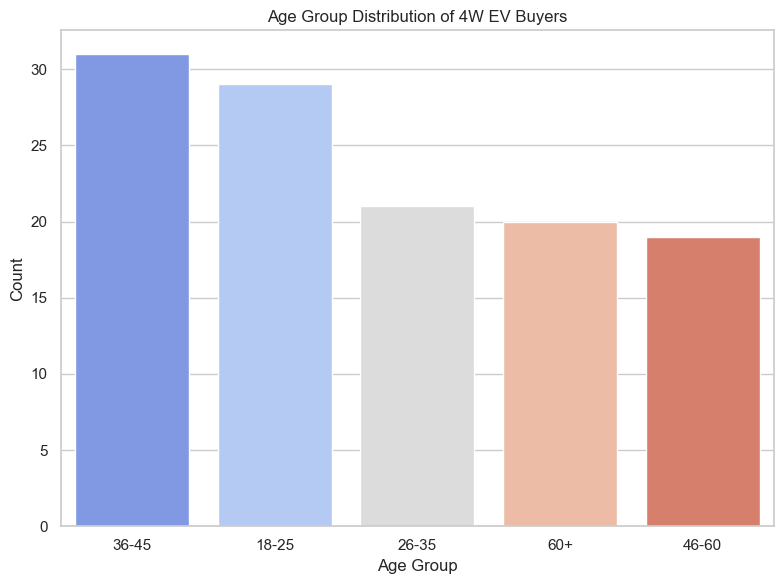

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ev_4w, x="Age Group", palette="coolwarm", order=ev_4w["Age Group"].value_counts().index)
plt.title("Age Group Distribution of 4W EV Buyers")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Urban vs rural vs semi-urban penetration of 4W EVs.

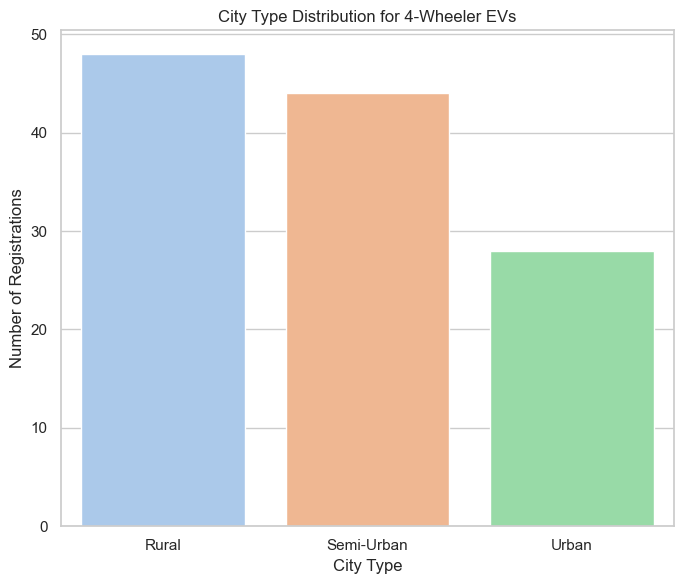

In [38]:
plt.figure(figsize=(7, 6))
sns.countplot(data=ev_4w, x="City Type", palette="pastel", order=ev_4w["City Type"].value_counts().index)
plt.title("City Type Distribution for 4-Wheeler EVs")
plt.xlabel("City Type")
plt.ylabel("Number of Registrations")
plt.tight_layout()
plt.show()


In [39]:
ev_pct = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\ev_registration_percentage_by_state.csv")



Top 10 States by 4W EV Volume and Share

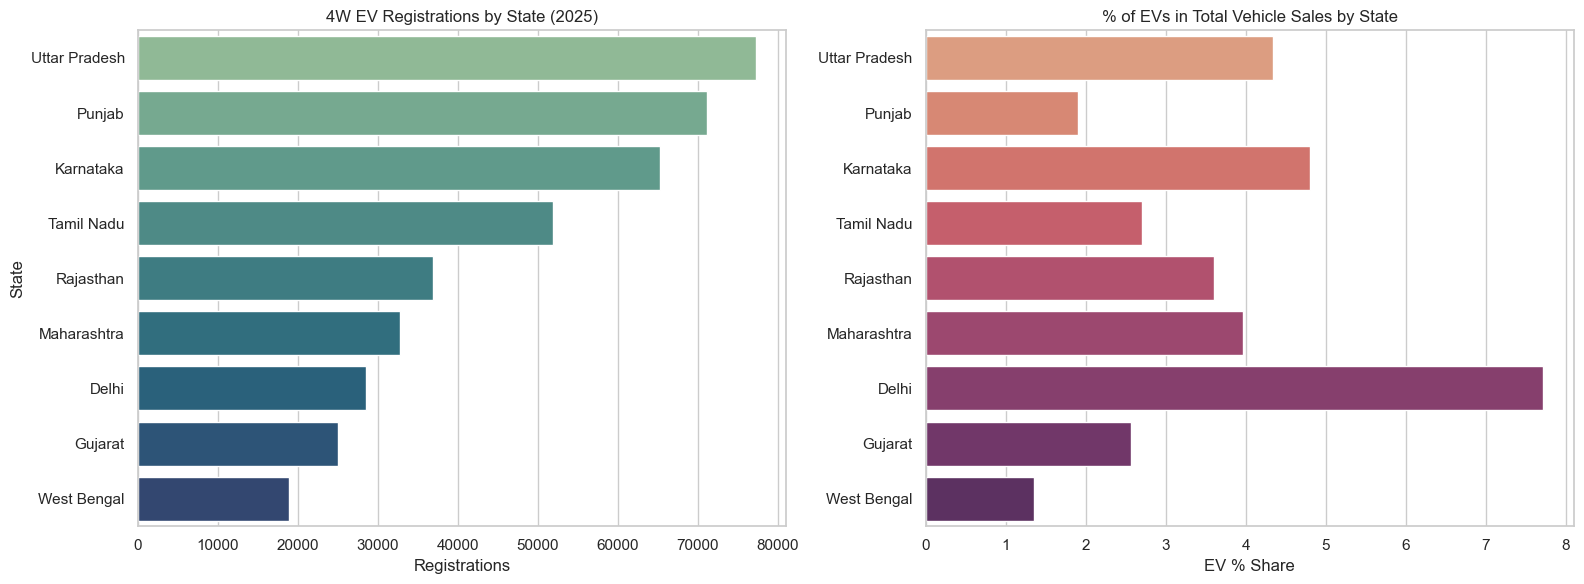

In [40]:
# Filter for 4W data
ev_4w_latest = ev_4w[(ev_4w["Vehicle Type"] == "4W") & (ev_4w["Year"] == 2025)]

# Keep only required columns
ev_4w_latest = ev_4w_latest[["State", "Registrations"]]

# Clean state names (strip whitespace if needed)
ev_4w_latest["State"] = ev_4w_latest["State"].str.strip()
ev_pct["State/ UT"] = ev_pct["State/ UT"].str.strip()

# Rename column for merging
ev_pct.rename(columns={"State/ UT": "State"}, inplace=True)

# Merge on common states
merged = pd.merge(ev_4w_latest, ev_pct, on="State")

# Sort by registrations for better visual
merged.sort_values(by="Registrations", ascending=False, inplace=True)

# Plotting side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 4W EV Registrations
sns.barplot(data=merged, y="State", x="Registrations", palette="crest", ax=axes[0])
axes[0].set_title("4W EV Registrations by State (2025)")
axes[0].set_xlabel("Registrations")
axes[0].set_ylabel("State")

# Plot % Share of EVs
sns.barplot(data=merged, y="State", x="% of Share of EV in Total Vehicles Sold", palette="flare", ax=axes[1])
axes[1].set_title("% of EVs in Total Vehicle Sales by State")
axes[1].set_xlabel("EV % Share")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [41]:
# Load charging station data
charging = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\charging_stations_data.csv")


# Preview first few rows
print("🔌 Charging Station Data (Raw):")
print(charging.head())

🔌 Charging Station Data (Raw):
   S.No              State  Operational_Charging_Stations
0     1  Andaman & Nicobar                              3
1     2     Andhra Pradesh                            327
2     3  Arunachal Pradesh                              9
3     4              Assam                             86
4     5              Bihar                            124


4W EVs per Charging Station Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16460\3821158759.py:23: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


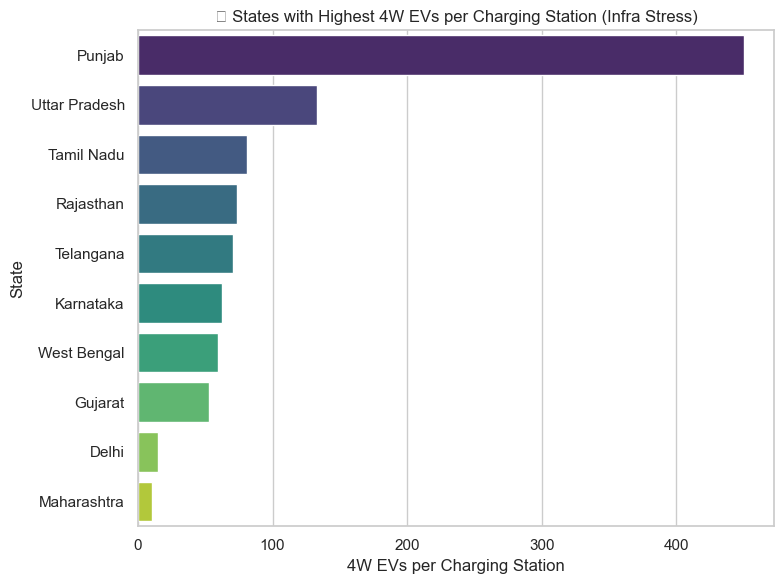

In [42]:
# Filter only 4W data for latest year
ev_4w_latest = ev_4w[(ev_4w["Vehicle Type"] == "4W") & (ev_4w["Year"] == 2025)][["State", "Registrations"]]

# Clean state names in both datasets
ev_4w_latest["State"] = ev_4w_latest["State"].str.strip()
charging["State"] = charging["State"].str.strip()

# Merge 4W EV registrations with charging station data
infra_4w = pd.merge(ev_4w_latest, charging, on="State", how="left")

# Calculate EVs per Charging Station
infra_4w["EVs_per_Charging_Station"] = infra_4w["Registrations"] / infra_4w["Operational_Charging_Stations"]

# Sort and pick top 10 infrastructure-stressed states
top_infra_stress_4w = infra_4w.sort_values(by="EVs_per_Charging_Station", ascending=False).head(10)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=top_infra_stress_4w, x="EVs_per_Charging_Station", y="State", palette="viridis")
plt.title("🚘 States with Highest 4W EVs per Charging Station (Infra Stress)")
plt.xlabel("4W EVs per Charging Station")
plt.ylabel("State")
plt.tight_layout()
plt.show()


Clustering States by 4W EV Adoption

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


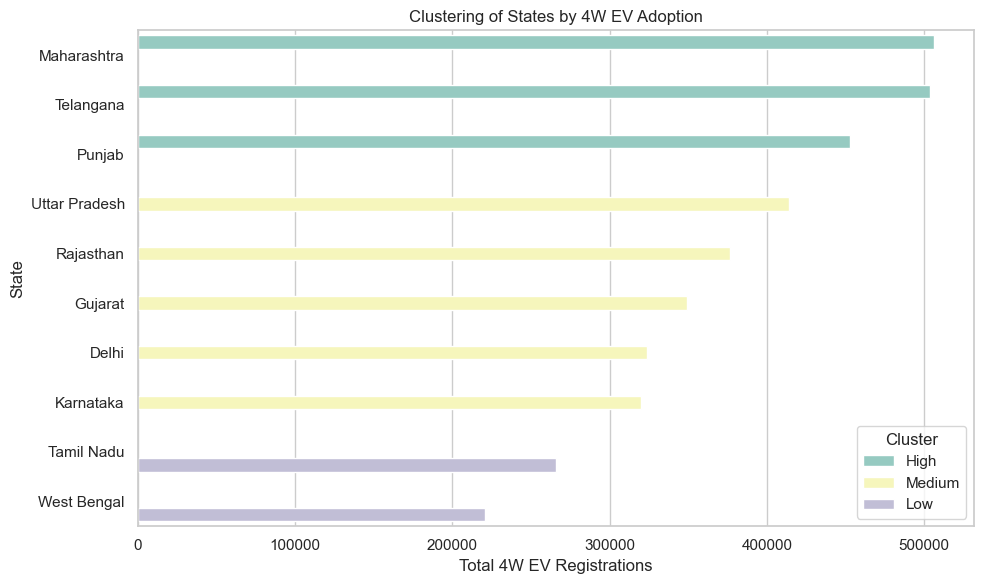

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Group total 4W registrations by state (across all years or use 2025)
state_4w = ev_4w[ev_4w["Vehicle Type"] == "4W"].groupby("State")["Registrations"].sum().reset_index()

# Normalize the data
scaler = StandardScaler()
state_4w_scaled = scaler.fit_transform(state_4w[["Registrations"]])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
state_4w["Cluster"] = kmeans.fit_predict(state_4w_scaled)

# Dynamically assign cluster labels based on mean registrations
cluster_means = state_4w.groupby("Cluster")["Registrations"].mean()
cluster_rank = cluster_means.rank().astype(int) - 1
rank_to_label = {0: "Low", 1: "Medium", 2: "High"}
label_map = cluster_rank.map(rank_to_label)
state_4w["Cluster_Label"] = state_4w["Cluster"].map(label_map)

plt.figure(figsize=(10, 6))
sns.barplot(data=state_4w.sort_values(by="Registrations", ascending=False),
            x="Registrations", y="State", hue="Cluster_Label", palette="Set3")

plt.title("Clustering of States by 4W EV Adoption")
plt.xlabel("Total 4W EV Registrations")
plt.ylabel("State")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



4W EV Year-on-Year Growth Rate

In [44]:
# Group total 4W EV registrations by year
ev_4w_trend = ev_4w[ev_4w["Vehicle Type"] == "4W"].groupby("Year")["Registrations"].sum().reset_index()

# Calculate YoY Growth Rate
ev_4w_trend["YoY_Growth (%)"] = ev_4w_trend["Registrations"].pct_change() * 100
ev_4w_trend["YoY_Growth (%)"] = ev_4w_trend["YoY_Growth (%)"].round(2)

# Display
print("📈 Four-Wheeler EV Registration Trend and YoY Growth:\n")
print(ev_4w_trend)

# Generate insights
print("\n🔍 Key Insights:")
for i in range(1, len(ev_4w_trend)):
    year = ev_4w_trend.loc[i, "Year"]
    growth = ev_4w_trend.loc[i, "YoY_Growth (%)"]
    
    if growth > 50:
        print(f"🚀 {year}: Massive growth of {growth}% — likely due to strong policy push or market shift.")
    elif growth > 0:
        print(f"📈 {year}: Positive growth of {growth}% — steady adoption increasing.")
    elif growth < 0:
        print(f"📉 {year}: Decline of {growth}% — potential market or external disruption.")
    else:
        print(f"➖ {year}: No significant change.")


📈 Four-Wheeler EV Registration Trend and YoY Growth:

    Year  Registrations  YoY_Growth (%)
0   2014          79766             NaN
1   2015          62948          -21.08
2   2016          63327            0.60
3   2017          69874           10.34
4   2018         311844          346.29
5   2019         572687           83.65
6   2020         454701          -20.60
7   2021         411218           -9.56
8   2022         320833          -21.98
9   2023         414160           29.09
10  2024         530620           28.12
11  2025         441717          -16.75

🔍 Key Insights:
📉 2015: Decline of -21.08% — potential market or external disruption.
📈 2016: Positive growth of 0.6% — steady adoption increasing.
📈 2017: Positive growth of 10.34% — steady adoption increasing.
🚀 2018: Massive growth of 346.29% — likely due to strong policy push or market shift.
🚀 2019: Massive growth of 83.65% — likely due to strong policy push or market shift.
📉 2020: Decline of -20.6% — potential mark

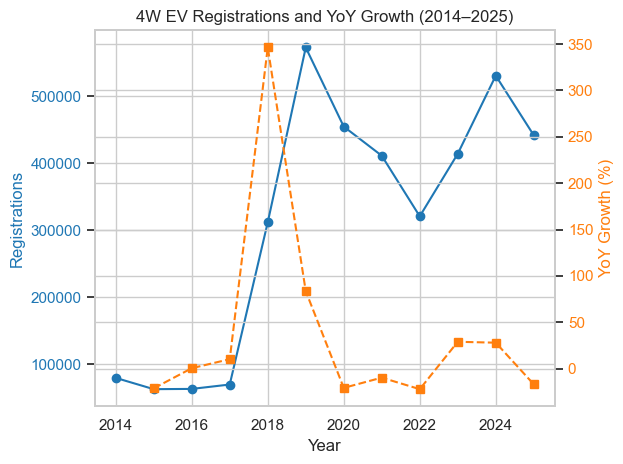

In [45]:
# Dual-axis plot
fig, ax1 = plt.subplots()

# Line plot for registrations
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Registrations', color=color)
ax1.plot(ev_4w_trend['Year'], ev_4w_trend['Registrations'], color=color, marker='o', label='Registrations')
ax1.tick_params(axis='y', labelcolor=color)

# Secondary axis for growth
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('YoY Growth (%)', color=color)
ax2.plot(ev_4w_trend['Year'], ev_4w_trend['YoY_Growth (%)'], color=color, marker='s', linestyle='--', label='YoY Growth')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("4W EV Registrations and YoY Growth (2014–2025)")
fig.tight_layout()
plt.show()
